In [1]:
# Author ~ Markela Zeneli
# Goldsmiths, University of London
########################################

import pandas as pd
import numpy as np
import os
import fnmatch
import datetime
import math
import matplotlib.pyplot as plt

#Initialise lists and variables
race = []
gender = []
outcome = []
age = []
crime = []

count1 = 0
count2 = 0
count3 = 0
count4 = 0

#Add CSV columns to respective lists
def all(path):
    '''Appends values from current path into the lists "race", "gender", "outcome", and "age"'''
    global race
    global gender
    global outcome
    global age
    
    df = pd.read_csv(path, sep=',')

    df['Officer-defined ethnicity'].replace('', np.nan, inplace=True)
    df['Gender'].replace('', np.nan, inplace=True)
    df['Outcome'].replace('', np.nan, inplace=True)
    df['Age range'].replace('', np.nan, inplace=True)

    ##DropN/A used when conditioning on specific variables (i.e age)
    #df.dropna(subset=['Officer-defined ethnicity','Gender','Outcome','Age range'], axis = 0, how = "any", inplace = True)

    race += df['Officer-defined ethnicity'].tolist()
    gender +=df['Gender'].tolist()
    outcome += df['Outcome'].tolist()
    age += df['Age range'].tolist()
    

def crimeCount(path):
    '''Appends values from current path into the "crime" list'''
    global crime

    df = pd.read_csv(path, sep=',')

    df['Crime type'].replace('', np.nan, inplace=True)

    #DropN/A used when conditioning on specific variables (i.e age)
    #df.dropna(subset=['Crime type'], axis = 0, how = "any", inplace = True)

    crime += df['Crime type'].tolist()

#Populates the lists in the "all" function with the summative data between month1 year1 and month2 year2
def getDates(month1, year1, month2, year2):
    '''This function calls the "all" function above, summating data from a pre-specified start date and end date. It calls "all" on both City of London and Metropolitan police data.'''
    #If operating on a month-by-month basis
    if month1==month2 and year1==year2:
        if month1<10:
            #Populate the Stop and Search demographics lists for Metropolitan and City of London
            all('data/'+str(year1)+'-0'+str(month1)+'/'+str(year1)+'-0'+str(month1)+'-city-of-london-stop-and-search.csv')
            all('data/'+str(year1)+'-0'+str(month1)+'/'+str(year1)+'-0'+str(month1)+'-metropolitan-stop-and-search.csv')
            
            #Populate the Crimes Reported list for Metropolitan and City of London
            crimeCount('data/'+str(year1)+'-0'+str(month1)+'/'+str(year1)+'-0'+str(month1)+'-city-of-london-street.csv')
            crimeCount('data/'+str(year1)+'-0'+str(month1)+'/'+str(year1)+'-0'+str(month1)+'-metropolitan-street.csv')
        else:
            all('data/'+str(year1)+'-'+str(month1)+'/'+str(year1)+'-'+str(month1)+'-city-of-london-stop-and-search.csv')
            all('data/'+str(year1)+'-'+str(month1)+'/'+str(year1)+'-'+str(month1)+'-metropolitan-stop-and-search.csv')
            crimeCount('data/'+str(year1)+'-'+str(month1)+'/'+str(year1)+'-'+str(month1)+'-city-of-london-street.csv')
            crimeCount('data/'+str(year1)+'-'+str(month1)+'/'+str(year1)+'-'+str(month1)+'-metropolitan-street.csv')

    #If summating data for multiple month intervals
    else:
        #Start date
        d = datetime.date(year1,month1,15)

        #Size of each step
        month_delta = datetime.timedelta(days=30)

        #End date
        end_date = datetime.date(year2,month2,15)
        #print(end_date)

        #Calculates difference in dates (by metric of .days), and turns into months by dividing by 30 and rounding up
        for i in range(math.ceil(((end_date - d).days)/30)):
            #File paths for months with 1 digit (adds a 0 in front to keep in line with format of file path)
            if (d + i*month_delta).month < 10:
                #Populate the Stop and Search demographics lists for Metropolitan and City of London (adds a zero in front if month is a single digit)
                all('data/'+str((d + i*month_delta).year)+'-0'+str((d + i*month_delta).month)+'/'+str((d + i*month_delta).year)+'-0'+str((d + i*month_delta).month)+'-city-of-london-stop-and-search.csv')
                all('data/'+str((d + i*month_delta).year)+'-0'+str((d + i*month_delta).month)+'/'+str((d + i*month_delta).year)+'-0'+str((d + i*month_delta).month)+'-metropolitan-stop-and-search.csv')
                #Populate the Crimes Reported list for Metropolitan and City of London (adds a zero in front if month is a single digit)
                crimeCount('data/'+str((d + i*month_delta).year)+'-0'+str((d + i*month_delta).month)+'/'+str((d + i*month_delta).year)+'-0'+str((d + i*month_delta).month)+'-city-of-london-street.csv')
                crimeCount('data/'+str((d + i*month_delta).year)+'-0'+str((d + i*month_delta).month)+'/'+str((d + i*month_delta).year)+'-0'+str((d + i*month_delta).month)+'-metropolitan-street.csv')
            else:
                #Populate lists if months >= 10
                all('data/'+str((d + i*month_delta).year)+'-'+str((d + i*month_delta).month)+'/'+str((d + i*month_delta).year)+'-'+str((d + i*month_delta).month)+'-city-of-london-stop-and-search.csv')
                all('data/'+str((d + i*month_delta).year)+'-'+str((d + i*month_delta).month)+'/'+str((d + i*month_delta).year)+'-'+str((d + i*month_delta).month)+'-metropolitan-stop-and-search.csv')
                crimeCount('data/'+str((d + i*month_delta).year)+'-'+str((d + i*month_delta).month)+'/'+str((d + i*month_delta).year)+'-'+str((d + i*month_delta).month)+'-city-of-london-street.csv')
                crimeCount('data/'+str((d + i*month_delta).year)+'-'+str((d + i*month_delta).month)+'/'+str((d + i*month_delta).year)+'-'+str((d + i*month_delta).month)+'-metropolitan-street.csv')

In [2]:
#Time range of CSVs
month1=4
year1=2018
month2=11
year2=2020
#Increment placeholder
month3=0
year3=year1

#STORES
ssTotal = []
cadTotal = []
ssA = []
ssB = []
ssW = []

In [3]:
def dateIterator(increment):
    '''This function iterates through the timeline of the dataset at a specified increment. It will call the "getDates" function at each increment, and print the summarised statistics before moving onto the next increment.'''
    global month1, year1, month2, year2, month3, year3, race, age, gender, outcome, crime, count1, count2, count3, count4

    #Special-case flag for when month1 = 1 and increment = 1
    flag = False

    #While the start of each increment is before the end date
    while ((month1 <= month2 and year1 <= year2) or (month2 < month1 and year1 < year2)):

        #Add increment to a temp month, "month3". This is the temporary end date.
        month3 = month1 + increment - 1

        #If temp month exceeds 12 (i.e goes into the next year), update temp date accordingly
        if month3 > 12:
            year3 = year1 + 1
            month3 = month3 % 12

        #If temporary end date date exceeds final end date, run "getDates" with final end date instead, then quit the function
        if ((month2 < month3 and year2 <= year3) or (month3 < month2 and year2 < year3)):
            getDates(month1, year1, month2, year2)
            quit()
            
        #Call "getDates" with start date and temporary end date
        getDates(month1, year1, month3, year3)

        #Stop and search demographics stat
        for i in range(len(outcome)):
            if outcome[i]: #== "White" and gender[i] == "Male" and (age[i] == "10-17" or age[i] == "18-24"):
                count1+=1
                #if outcome[i] == "A no further action disposal"  :
                    #count2+=1
        #"""+geography=fixed for count2"""

        ssTotal.append(count1)

        #Crime count stat * see KEY in markdown table below
        for i in range(len(crime)):
            if crime[i] != "Anti-social behaviour":
                count3+=1
        
        #count4 = len(crime)
        #stat_c = count3/count4

        cadTotal.append(count3)

        # #Print stats for this increment
        # print("--------------------------------------")
        # print("Start date: "+str(month1)+"/"+str(year1))
        # print("End date: "+str(month3)+"/"+str(year3))
        # print("Stop and Search")
        # print(str(count1) + ',' + str(count2))
        # print(stat)
        # print("Crime")
        # print(str(count3) + ',' + str(count4))
        # print(stat_c)
        # print("--------------------------------------")

        #Reset lists and variables
        race = []
        gender = []
        outcome = []
        age = []
        crime = []
        count1 = 0
        count2 = 0
        count3 = 0
        count4 = 0

        #Check if new start date (month3+1) exceeds 12 month scale, and update accordingly if so
        if month3+1 > 12:
            year3 = year1 + 1
            month3 = (month3 + 1) % 12 
            flag = True
        
        #Update start date to new values
        year1 = year3
        if (month3 == 1) and (increment == 1) and flag == True:
            month1 = month3
            flag = False
        else:
            month1 = month3+1

#Call dateIterator with chosen increment
dateIterator(1)

In [4]:
print(ssTotal)
print(cadTotal)
print(len(ssTotal))
print(min(ssTotal))
print(min(cadTotal))

[12970, 12474, 10673, 9704, 15268, 11778, 12782, 15318, 15639, 18141, 18549, 26826, 21003, 21559, 23374, 25199, 26790, 22342, 23025, 22200, 19461, 29062, 23680, 23781, 30733, 43786, 30254, 26427, 20334, 20177, 24964, 26759]
[67036, 71603, 70829, 75107, 69580, 69149, 74383, 74655, 71509, 72334, 70418, 78736, 73177, 75869, 74689, 74375, 68759, 68184, 76878, 73595, 69966, 74141, 70687, 64944, 47397, 55681, 60890, 68485, 69388, 69253, 68771, 63463]
32
9704
47397


In [5]:
# Calculating the Kullback-Leibler divergence (relative entropy) between the probability distribution of Stop and Search, and probability distribution of Crimes Reported.

# To begin, data will be categorised into intervals. First create probability distributions of Stop and Search + Crimes Reported. Split ssTotal range and cadTotal range into intervals/"windows", where they will be compared in a nested manner. 
# The shape of this 2D array is equal to the number of cadTotal intervals * the number of ssTotal intervals. The array will store the probabilities of the ss and cad values existing at each interval.

numberIntervalsCAD = 40
numberIntervalsSS = 40
numberTimeWindows = len(cadTotal)
intervalSizeCAD = 1500
intervalSizeSS = 1000
final = [[0] * numberIntervalsSS for i in range(numberIntervalsCAD)]

for x in range (0, numberIntervalsCAD):
    for y in range (0, numberIntervalsSS):
        for j in range(0, numberTimeWindows):
            check1 = (x*intervalSizeCAD + 45000 < cadTotal[j]) and (cadTotal[j] <= (x+1)*intervalSizeCAD - 1 + 45000)
            check2 = (y*intervalSizeSS + 9000< ssTotal[j]) and (ssTotal[j] <= (y+1)*intervalSizeSS + 8999)
            if(check1 and check2):
                final[x][y] += 1
#print(final)
#print(max(list(map(max, final))))

final_cad = [0] * numberIntervalsCAD
for x in range(numberIntervalsCAD):
    for j in range(numberTimeWindows): 
        check1 = (x*intervalSizeCAD + 45000 < cadTotal[j]) and (cadTotal[j] <= (x+1)*intervalSizeCAD - 1 + 45000)
        if check1:
            final_cad[x] += 1
           
final_ss = [0] * numberIntervalsSS
for y in range(numberIntervalsSS):
    for j in range(numberTimeWindows): 
        check2 = (y*intervalSizeSS + 9000 < ssTotal[j]) and (ssTotal[j] <= (y+1)*intervalSizeSS + 8999)
        if check2:
            final_ss[y] += 1

# final_ss has a length of the number of intervals for stop and search. The sum of all of the values in final_ss is equal to the number of data points (32)
print(final_ss)

[1, 1, 1, 3, 0, 0, 3, 0, 0, 2, 1, 2, 2, 2, 4, 1, 1, 4, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


In [8]:
#Once data is in discrete form, calculate Kullback-Leibler divergence and independent joint probability of "Stop and Search" and "Crimes Reported" values

count5 = 0
for i in range(len(final)):
    for j in range(len(final[i])):
        count5 += final[i][j]

final_prob = [[0] * numberIntervalsSS for i in range(numberIntervalsCAD)]

for i in range(len(final)):
    for j in range(len(final[i])):
        final_prob[i][j] = final[i][j] / count5

count6 = 0
for i in range(len(final_cad)):
    count6 += final_cad[i]

final_cad_prob = [0] * numberIntervalsCAD

for i in range(len(final_cad)):
    final_cad_prob[i] = final_cad[i] / count6

count6 = 0

for i in range(len(final_ss)):
    count6 += final_ss[i]

final_ss_prob = [0] * numberIntervalsSS

for i in range(len(final_ss)):
    final_ss_prob[i] = final_ss[i] / count6

# Calculate the discrete Kullback-Leibler divergence between final_ss and final_cad
# D(kl)(SS || CR) = sigma(SS(x).log(SS(x)/CR(x))) 
# where SS = stop and search probabilities, CR = crimes reported probabilities, x denotes the month (time interval of data points)

KLD = 0

for i in range(len(final_ss_prob)):
    #If final_cad_prob is 0, then a zero division error will occur. If final_ss_prob is 0, then an error will occur when attempting to perform log on 0.
    if final_cad_prob[i] == 0 or final_ss_prob[i] == 0:
        continue
    KLD += final_ss_prob[i] * math.log((final_ss_prob[i]/final_cad_prob[i]),2)

print("Kullback-Leibler divergence: " + str(KLD))

#Independent joint probability
final_prob_ind = [[0] * numberIntervalsSS for i in range(numberIntervalsCAD)]

for i in range(len(final_cad_prob)):
    for j in range(len(final_ss_prob)):
        final_prob_ind[i][j] = final_cad_prob[i] * final_ss_prob[j]

#print(final_prob_ind)

Kullback-Leibler divergence: 0.2629699218524639


The following graph shows the probability distribution of the data points in the given intervals. The yellow points indicate a stronger likelihood that the data is in that range.

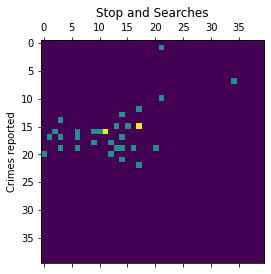

In [7]:
plt.matshow(final)
plt.title('Stop and Searches')
plt.ylabel('Crimes reported')
plt.savefig('output.png')

## Table of stats

These figures were gathered prior to the data cleaning.

KEY: 

(*) - This probability is the number of street crimes reported which are not related to "Anti-social behaviour". This constraint exists because "Anti-social behaviour" can be subjective to the person reporting the crime, and does not always indicate a threat to society. At least, the type of threat which supposedly justifies the volume of Stop and Searches that do occur. Comparing with the "Crimes Reported" data can also be seen as an acknowledgement of the claim that Stop and Searches have a preventative effect on crime. ["The police use these powers to help make the local community safer by preventing and detecting crime."](https://www.met.police.uk/advice/advice-and-information/st-s/stop-and-search/stop-and-search-process/). 

Age = 10-24 --> (age(i) == "10-17" or age(i) == "18-24")

Age = 25+ --> (age(i) != "10-17" and age(i) != "18-24")


TBC

|start date|end date|S+S innocence|S+S volume|Crime*|Crime reported|notes|
|---|---|---|---|---|---|---| 
|12/2017|11/2020|0.76|66245|0.73|2634530|entire dataset, no constraints|
|12/2017|01/2018|0.39|21689|0.81|134974|general stats for pairs of months|
|02/2018|03/2018|0.70|10851|0.82|62536||
|04/2018|05/2018|0.73|12970|0.77|67036||
|06/2018|07/2018|0.72|10673|0.78|70829|| 
|08/2018|09/2018|0.73|27046|0.79|138729|?|
|10/2018|11/2018|0.72|28100|0.79|149038|?|
|12/2018|01/2019|0.74|33780|0.81|143843|?|
|02/2019|03/2019|0.75|18549|0.81|70418||
|04/2019|05/2019|0.76|21003|0.79|73177||
|06/2019|07/2019|0.77|23374|0.77|74689||
|08/2019|09/2019|0.76|49132|0.76|136943||
|10/2019|11/2019|0.77|45225|0.79|150473||
|12/2019|01/2020|0.77|48523|0.81|144107||
|02/2020|03/2020|0.77|23680|0.81|70687||
|04/2020|05/2020|0.77|30733|0.43|47397||
|06/2020|07/2020|0.79|30254|0.61|60890||
|08/2020|09/2020|0.76|40511|0.67|138641||
|10/2020|11/2020|0.77|51723|0.67|132234|end pairs|
|12/2017|01/2018|0.38|3745|0.81|134974|pairs of months, S+S volume given ethnicity = White, age = 10-24|
|02/2018|03/2018|ERR|ERR|0.82|62536||
|04/2018|05/2018|0.72|2115|0.77|67036||
|06/2018|07/2018|0.70|1560|0.78|70829|| 
|08/2018|09/2018|0.69|3589|0.79|138729|?|
|10/2018|11/2018|0.72|4206|0.79|149038|?|
|12/2018|01/2019|0.72|5489|0.81|143843|?|
|02/2019|03/2019|0.73|3166|0.81|70418||
|04/2019|05/2019|0.74|3345|0.79|73177||
|06/2019|07/2019|0.76|3564|0.77|74689||
|08/2019|09/2019|0.75|6987|0.76|136943||
|10/2019|11/2019|0.76|7486|0.79|150473||
|12/2019|01/2020|0.76|7795|0.81|144107||
|02/2020|03/2020|0.77|3997|0.81|70687||
|04/2020|05/2020|0.77|4521|0.43|47397||
|06/2020|07/2020|0.78|4976|0.61|60890||
|08/2020|09/2020|0.75|5902|0.67|138641||
|10/2020|11/2020|0.77|8290|0.67|132234|end pairs|
|12/2017|01/2018|0.37|3712|0.81|134974|pairs of months, S+S volume given ethnicity = White, age = 25+|
|02/2018|03/2018|0.67|3766|0.82|62536||
|04/2018|05/2018|0.70|2063|0.77|67036||
|06/2018|07/2018|0.71|1780|0.78|70829|| 
|08/2018|09/2018|0.69|4118|0.79|138729|?|
|10/2018|11/2018|0.69|4631|0.79|149038|?|
|12/2018|01/2019|0.72|5953|0.81|143843|?|
|02/2019|03/2019|0.73|3497|0.81|70418||
|04/2019|05/2019|0.73|3703|0.79|73177||
|06/2019|07/2019|0.75|4059|0.77|74689||
|08/2019|09/2019|0.74|8655|0.76|136943||
|10/2019|11/2019|0.75|7906|0.79|150473||
|12/2019|01/2020|0.75|8689|0.81|144107||
|02/2020|03/2020|0.75|4235|0.81|70687||
|04/2020|05/2020|0.77|5914|0.43|47397||
|06/2020|07/2020|0.77|5598|0.61|60890||
|08/2020|09/2020|0.75|7812|0.67|138641||
|10/2020|11/2020|0.75|9714|0.67|132234|end pairs|
|12/2017|01/2018|0.39|2152|0.81|134974|pairs of months, S+S volume given ethnicity = Asian, age = 10-24|
|02/2018|03/2018|ERR|ERR|0.82|62536||
|04/2018|05/2018|0.73|1265|0.77|67036||
|06/2018|07/2018|0.73|1049|0.78|70829|| 
|08/2018|09/2018|0.72|2467|0.79|138729|?|
|10/2018|11/2018|0.75|2982|0.79|149038|?|
|12/2018|01/2019|0.75|3436|0.81|143843|?|
|02/2019|03/2019|0.76|1699|0.81|70418||
|04/2019|05/2019|0.79|2000|0.79|73177||
|06/2019|07/2019|0.78|2421|0.77|74689||
|08/2019|09/2019|0.78|4576|0.76|136943||
|10/2019|11/2019|0.78|4187|0.79|150473||
|12/2019|01/2020|0.77|4399|0.81|144107||
|02/2020|03/2020|0.78|2238|0.81|70687||
|04/2020|05/2020|0.77|2697|0.43|47397||
|06/2020|07/2020|0.81|3017|0.61|60890||
|08/2020|09/2020|0.76|3507|0.67|138641||
|10/2020|11/2020|0.77|4691|0.67|132234|end pairs|
|12/2017|01/2018|0.36|1349|0.81|134974|pairs of months, S+S volume given ethnicity = Asian, age = 25+|
|02/2018|03/2018|0.68|1648|0.82|62536||
|04/2018|05/2018|0.72|845|0.77|67036||
|06/2018|07/2018|0.73|673|0.78|70829|| 
|08/2018|09/2018|0.71|1585|0.79|138729|?|
|10/2018|11/2018|0.72|1991|0.79|149038|?|
|12/2018|01/2019|0.75|2404|0.81|143843|?|
|02/2019|03/2019|0.75|1245|0.81|70418||
|04/2019|05/2019|0.78|1504|0.79|73177||
|06/2019|07/2019|0.79|1660|0.77|74689||
|08/2019|09/2019|0.77|3492|0.76|136943||
|10/2019|11/2019|0.78|3135|0.79|150473||
|12/2019|01/2020|0.76|3250|0.81|144107||
|02/2020|03/2020|0.76|1520|0.81|70687||
|04/2020|05/2020|0.77|2319|0.43|47397||
|06/2020|07/2020|0.81|2557|0.61|60890||
|08/2020|09/2020|0.76|3287|0.67|138641||
|10/2020|11/2020|0.78|4389|0.67|132234|end pairs|
|12/2017|01/2018|0.42|4905|0.81|134974|pairs of months, S+S volume given ethnicity = Black, age = 10-24|
|02/2018|03/2018|ERR|ERR|0.82|62536||
|04/2018|05/2018|0.75|3259|0.77|67036||
|06/2018|07/2018|0.74|2701|0.78|70829|| 
|08/2018|09/2018|0.76|7539|0.79|138729|?|
|10/2018|11/2018|0.74|6506|0.79|149038|?|
|12/2018|01/2019|0.75|7052|0.81|143843|?|
|02/2019|03/2019|0.76|3867|0.81|70418||
|04/2019|05/2019|0.78|4751|0.79|73177||
|06/2019|07/2019|0.79|5271|0.77|74689||
|08/2019|09/2019|0.78|11117|0.76|136943||
|10/2019|11/2019|0.78|9513|0.79|150473||
|12/2019|01/2020|0.79|10202|0.81|144107||
|02/2020|03/2020|0.80|4883|0.81|70687||
|04/2020|05/2020|0.79|6164|0.43|47397||
|06/2020|07/2020|0.79|5299|0.61|60890||
|08/2020|09/2020|0.76|7299|0.67|138641||
|10/2020|11/2020|0.77|8929|0.67|132234|end pairs|
|12/2017|01/2018|0.39|3231|0.81|134974|pairs of months, S+S volume given ethnicity = Black, age = 25+|
|02/2018|03/2018|0.72|4131|0.82|62536||
|04/2018|05/2018|0.73|1947|0.77|67036||
|06/2018|07/2018|0.73|1694|0.78|70829|| 
|08/2018|09/2018|0.76|4856|0.79|138729|?|
|10/2018|11/2018|0.73|4516|0.79|149038|?|
|12/2018|01/2019|0.74|5235|0.81|143843|?|
|02/2019|03/2019|0.76|2822|0.81|70418||
|04/2019|05/2019|0.77|3203|0.79|73177||
|06/2019|07/2019|0.76|3579|0.77|74689||
|08/2019|09/2019|0.77|8108|0.76|136943||
|10/2019|11/2019|0.79|6705|0.79|150473||
|12/2019|01/2020|0.78|7753|0.81|144107||
|02/2020|03/2020|0.77|3713|0.81|70687||
|04/2020|05/2020|0.78|5206|0.43|47397||
|06/2020|07/2020|0.79|4681|0.61|60890||
|08/2020|09/2020|0.78|6711|0.67|138641||
|10/2020|11/2020|0.78|7923|0.67|132234|end pairs|
|12/2017|02/2018|0.49|32540|0.81|197510|general stats for every 3 months|
|03/2018|05/2018|0.71|36437|0.79|205996||
|06/2018|08/2018|0.72|35645|0.78|215516||
|09/2018|11/2018|0.72|39878|0.79|218187|| 
|12/2018|02/2019|0.74|52329|0.81|214261|?|
|03/2019|05/2019|0.74|52329|0.79|227782|?|
|06/2019|08/2019|0.76|75363|0.75|217823|?|
|09/2019|11/2019|0.77|67567|0.79|218657|?|
|12/2019|02/2020|0.77|72203|0.81|214794||
|03/2020|05/2020|0.79|98300|0.54|168022||
|06/2020|08/2020|0.77|77015|0.64|198763||
|09/2020|11/2020|0.77|71900|0.68|201487|end triples|
|12/2017|02/2018|0.37|3761|0.81|197510|every 3 months, ethnicity = White, age = 10-24|
|03/2018|05/2018|0.71|4083|0.79|205996||
|06/2018|08/2018|0.69|4670|0.78|215516||
|09/2018|11/2018|0.70|5968|0.79|218187|| 
|12/2018|02/2019|0.73|8655|0.81|214261|early spike|
|03/2019|05/2019|0.75|11212|0.79|227782|SPIKE|
|06/2019|08/2019|0.75|10771|0.75|217823||
|09/2019|11/2019|0.76|10759|0.79|218657||
|12/2019|02/2020|0.77|11792|0.81|214794||
|03/2019|05/2020|0.78|14984|0.54|168022|SPIKE|
|06/2020|08/2020|0.76|11639|0.64|198763||
|09/2020|11/2020|0.77|11372|0.68|201487|end triples|
|12/2017|02/2018|0.52|7478|0.81|197510|every 3 months, ethnicity = White, age = 25+|
|03/2018|05/2018|0.68|7673|0.79|205996||
|06/2018|08/2018|0.69|5563|0.78|215516||
|09/2018|11/2018|0.68|6581|0.79|218187|| 
|12/2018|02/2019|0.72|9450|0.81|214261||
|03/2019|05/2019|0.73|12380|0.79|227782|SPIKE|
|06/2019|08/2019|0.75|12684|0.75|217823||
|09/2019|11/2019|0.74|12120|0.79|218657||
|12/2019|02/2020|0.75|12924|0.81|214794||
|03/2019|05/2020|0.77|17660|0.54|168022|SPIKE|
|06/2020|08/2020|0.75|14699|0.64|198763||
|09/2020|11/2020|0.75|13588|0.68|201487|end triples|
|12/2017|02/2018|0.39|2153|0.81|197510|every 3 months, ethnicity = Asian, age = 10-24|
|03/2018|05/2018|0.72|2439|0.79|205996||
|06/2018|08/2018|0.71|3275|0.78|215516||
|09/2018|11/2018|0.73|4243|0.79|218187|| 
|12/2018|02/2019|0.75|5135|0.81|214261||
|03/2019|05/2019|0.78|6765|0.79|227782|SPIKE|
|06/2019|08/2019|0.78|7311|0.75|217823||
|09/2019|11/2019|0.78|6473|0.79|218657||
|12/2019|02/2020|0.77|6637|0.81|214794||
|03/2019|05/2020|0.79|8853|0.54|168022|SPIKE|
|06/2020|08/2020|0.79|7151|0.64|198763||
|09/2020|11/2020|0.77|6473|0.68|201487|end triples|
|12/2017|02/2018|0.54|2997|0.81|197510|every 3 months, ethnicity = Asian, age = 25+|
|03/2018|05/2018|0.72|3484|0.79|205996||
|06/2018|08/2018|0.71|2126|0.78|215516||
|09/2018|11/2018|0.72|2768|0.79|218187|| 
|12/2018|02/2019|0.75|3649|0.81|214261||
|03/2019|05/2019|0.77|4933|0.79|227782|SPIKE|
|06/2019|08/2019|0.78|5347|0.75|217823||
|09/2019|11/2019|0.78|4816|0.79|218657||
|12/2019|02/2020|0.76|4770|0.81|214794||
|03/2019|05/2020|0.79|7384|0.54|168022|SPIKE|
|06/2020|08/2020|0.78|6354|0.64|198763||
|09/2020|11/2020|0.78|6083|0.68|201487|end triples|
|12/2017|02/2018|0.42|4909|0.81|197510|every 3 months, ethnicity = Black, age = 10-24|
|03/2018|05/2018|0.74|6571|0.79|205996||
|06/2018|08/2018|0.75|9908|0.78|215516||
|09/2018|11/2018|0.74|9296|0.79|218187|| 
|12/2018|02/2019|0.75|10919|0.81|214261||
|03/2019|05/2019|0.77|15386|0.79|227782|SPIKE (after steep incline)|
|06/2019|08/2019|0.78|17768|0.75|217823||
|09/2019|11/2019|0.78|14044|0.79|218657||
|12/2019|02/2020|0.79|15085|0.81|214794||
|03/2019|05/2020|0.80|20259|0.54|168022|SPIKE|
|06/2020|08/2020|0.78|13645|0.64|198763||
|09/2020|11/2020|0.77|12520|0.68|201487|end triples|
|12/2017|02/2018|0.57|7362|0.81|197510|every 3 months, ethnicity = Black, age = 25+|
|03/2018|05/2018|0.71|8065|0.79|205996||
|06/2018|08/2018|0.74|6314|0.78|215516||
|09/2018|11/2018|0.73|6385|0.79|218187|| 
|12/2018|02/2019|0.74|8057|0.81|214261|?|
|03/2019|05/2019|0.77|10416|0.79|227782|? March - May more officers, b/c start of new tax year?|
|06/2019|08/2019|0.77|12346|0.75|217823|?|
|09/2019|11/2019|0.78|10074|0.79|218657|?|
|12/2019|02/2020|0.78|11466|0.81|214794||
|03/2019|05/2020|0.80|16340|0.54|168022|March - May more officers, b/c start of new tax year?|
|06/2020|08/2020|0.79|12467|0.64|198763||
|09/2020|11/2020|0.78|11150|0.68|201487|end triples|